<a href="https://colab.research.google.com/github/harsha1067/Projects/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
%%bash
# Generate a clean requirements.txt
cat > requirements.txt << 'EOF'
pandas
numpy
matplotlib
seaborn
squarify
scikit-learn
xgboost
imbalanced-learn
joblib
EOF

In [2]:
#Install all dependencies listed in requirements.txt
!pip install -r requirements.txt

In [3]:
!cat requirements.txt
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

pandas
numpy
matplotlib
seaborn
squarify
scikit-learn
xgboost
imbalanced-learn
joblib


In [4]:
#Import libraries required
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

##Read the csv file

In [5]:
from pathlib import Path

DATA_PATH = Path.cwd() / 'loan_data.csv'  #Builds a safe filepath
if not DATA_PATH.exists():
  raise FileNotFoundError(f"Expected {DATA_PATH} not found.")
df = pd.read_csv(DATA_PATH)  #Load the filepath into pandas

In [6]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Statistics summary of numerical data

Handling the Missing Values

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,45000.0,NaN,NaN,NaN,27.764178,6.045108,20.0,24.0,26.0,30.0,144.0
person_gender,45000,2,male,24841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_education,45000,5,Bachelor,13399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_income,45000.0,NaN,NaN,NaN,80319.053222,80422.498632,8000.0,47204.0,67048.0,95789.25,7200766.0
person_emp_exp,45000.0,NaN,NaN,NaN,5.410333,6.063532,0.0,1.0,4.0,8.0,125.0
person_home_ownership,45000,4,RENT,23443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,45000.0,NaN,NaN,NaN,9583.157556,6314.886691,500.0,5000.0,8000.0,12237.25,35000.0
loan_intent,45000,6,EDUCATION,9153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_int_rate,45000.0,NaN,NaN,NaN,11.006606,2.978808,5.42,8.59,11.01,12.99,20.0
loan_percent_income,45000.0,NaN,NaN,NaN,0.139725,0.087212,0.0,0.07,0.12,0.19,0.66


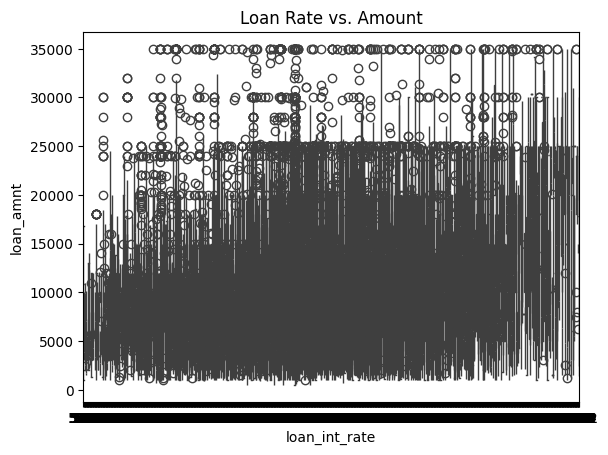

In [8]:
display(df.isna().sum().sort_values(ascending=False)) #Missing-value summary

display(df.describe(include='all').T) #Quick stats

sns.boxplot(x='loan_int_rate', y='loan_amnt', data=df) #Outlier sniff
plt.title("Loan Rate vs. Amount")
plt.show()

In [9]:
df.ndim

2

In [10]:
len(df)

45000

In [11]:
df.shape

(45000, 14)

In [12]:
df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [13]:
df.previous_loan_defaults_on_file.value_counts()

,count
previous_loan_defaults_on_file,
Yes,22858
No,22142


In [14]:
df[df.person_home_ownership == 'OWN']

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
11,21.0,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1
23,24.0,female,Bachelor,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3.0,600,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44683,23.0,male,Associate,23346.0,2,OWN,4027.0,VENTURE,15.01,0.17,4.0,646,No,1
44793,24.0,female,Associate,15542.0,0,OWN,2500.0,EDUCATION,12.69,0.16,4.0,655,No,1
44818,21.0,female,High School,15153.0,1,OWN,3000.0,EDUCATION,8.90,0.20,4.0,594,No,1
44825,22.0,male,High School,22538.0,1,OWN,4913.0,EDUCATION,13.68,0.22,5.0,637,No,1


In [15]:
df[df.person_gender == 'male']

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
12,23.0,male,Bachelor,114860.0,3,RENT,35000.0,VENTURE,7.90,0.30,2.0,573,No,1
13,26.0,male,Master,130713.0,0,RENT,35000.0,EDUCATION,18.39,0.27,4.0,708,No,1
16,23.0,male,Bachelor,144943.0,0,RENT,35000.0,EDUCATION,7.90,0.24,4.0,663,No,0
18,23.0,male,Bachelor,136628.0,0,RENT,35000.0,DEBTCONSOLIDATION,18.25,0.26,4.0,709,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [16]:
df[df.loan_status == 0]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
14,23.0,female,Associate,138998.0,0,RENT,35000.0,EDUCATION,7.90,0.25,4.0,583,No,0
15,23.0,female,Master,600891.0,5,MORTGAGE,30000.0,DEBTCONSOLIDATION,10.65,0.05,3.0,670,Yes,0
16,23.0,male,Bachelor,144943.0,0,RENT,35000.0,EDUCATION,7.90,0.24,4.0,663,No,0
20,25.0,male,Bachelor,195718.0,0,RENT,35000.0,VENTURE,7.49,0.18,4.0,684,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42103,36.0,male,Bachelor,60006.0,15,OWN,2755.0,MEDICAL,8.92,0.05,9.0,609,Yes,0
42104,25.0,female,Bachelor,64146.0,2,MORTGAGE,7200.0,VENTURE,10.28,0.11,3.0,625,Yes,0
42105,43.0,male,Doctorate,93061.0,21,MORTGAGE,12966.0,VENTURE,14.40,0.14,12.0,690,Yes,0
42106,28.0,female,High School,110291.0,7,RENT,13453.0,VENTURE,13.29,0.12,6.0,631,Yes,0


In [17]:
df2 = df.head(200)

##Data Visualization

###Count Plot

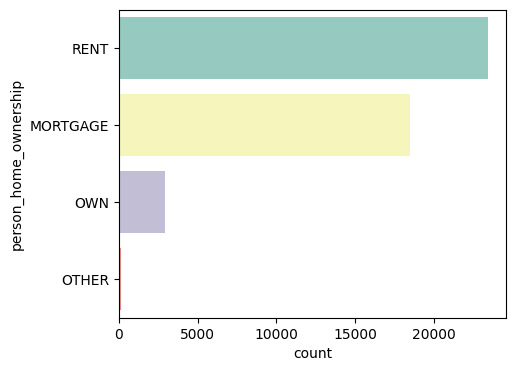

In [18]:
plt.figure(figsize=(5, 4))
sns.countplot(y='person_home_ownership', palette='Set3', data=df, order=df['person_home_ownership'].value_counts().index);

###Distribution plot & Countplot for filtered data

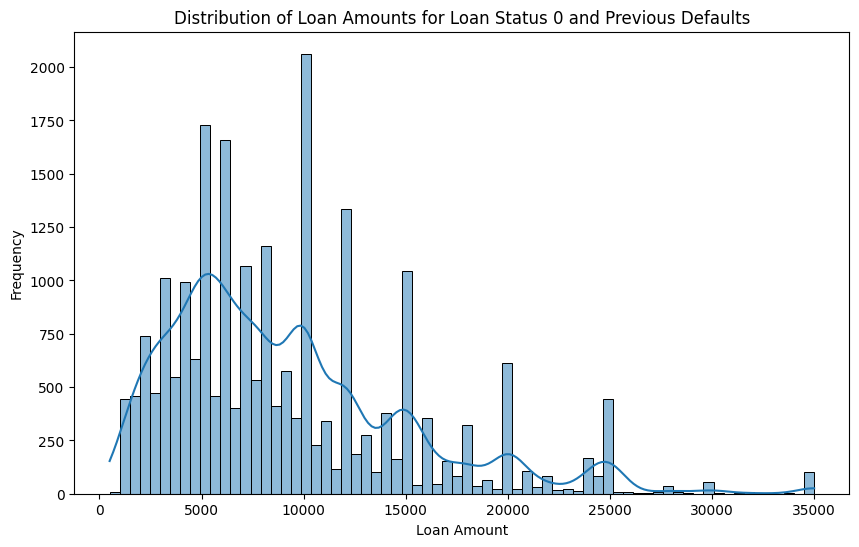

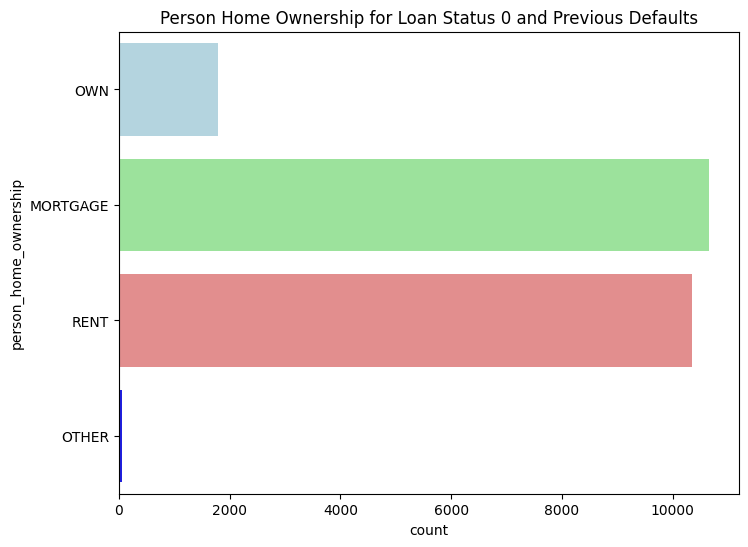

In [19]:
# Create the mask
mask = (df['loan_status'] == 0) & (df['previous_loan_defaults_on_file'] == 'Yes')

# Apply the mask to the DataFrame
filtered_df = df[mask]

#Distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts for Loan Status 0 and Previous Defaults')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

#Countplot
plt.figure(figsize=(8,6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'blue']
sns.countplot(y='person_home_ownership', data=filtered_df, palette=colors)
plt.title('Person Home Ownership for Loan Status 0 and Previous Defaults')
plt.show()

###Histogram

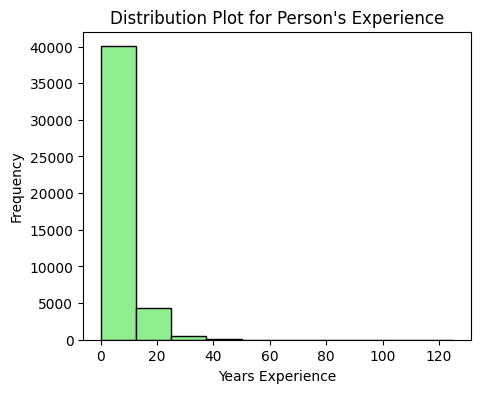

In [20]:
plt.figure(figsize=(5, 4))
plt.hist(df['person_emp_exp'], bins=10, edgecolor='black', color='lightgreen')
plt.title("Distribution Plot for Person's Experience")
plt.xlabel('Years Experience')
plt.ylabel("Frequency");

###Scatterplot

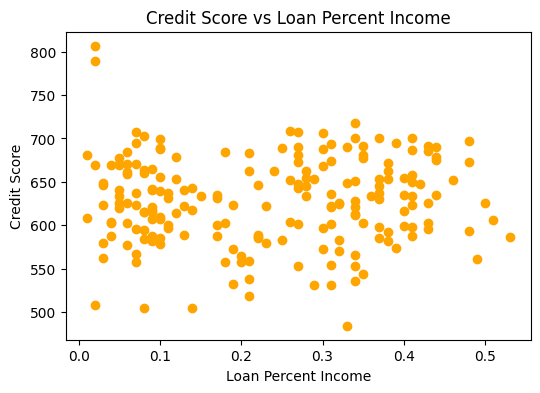

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(
    x=df2['loan_percent_income'],
    y=df2['credit_score'],
    color='orange',
)

plt.title("Credit Score vs Loan Percent Income"),
plt.xlabel("Loan Percent Income"),
plt.ylabel("Credit Score");

###Network Graph

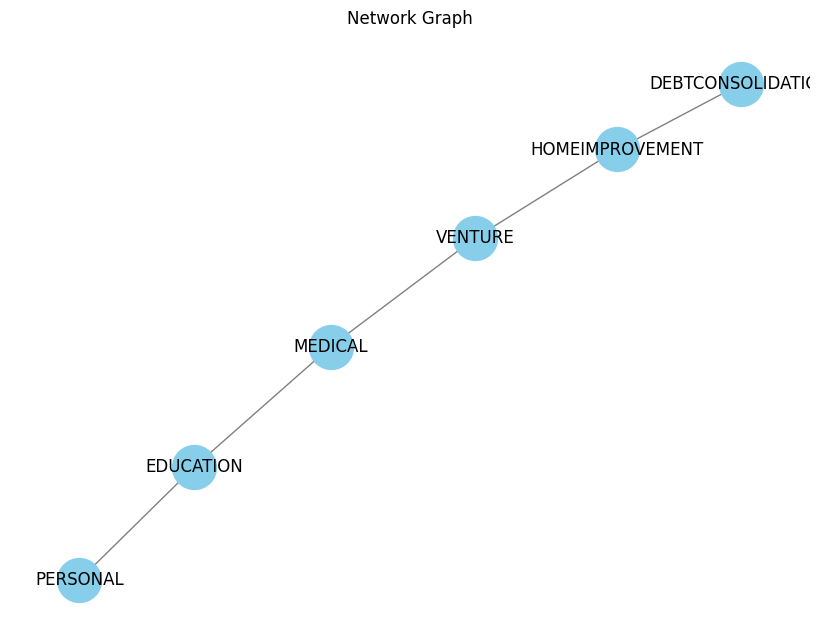

In [22]:
import networkx as nx

#Assuming DF with column_data
column_data = df['loan_intent']

#Create an empty graph
G = nx.Graph()

#Add nodes
nodes = column_data.unique()
G.add_nodes_from(nodes)

#Add edges
edges = [(nodes[i], nodes[i+1]) for i in range(len(nodes)-1)]
G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.title("Network Graph")
plt.show()

###Tree map

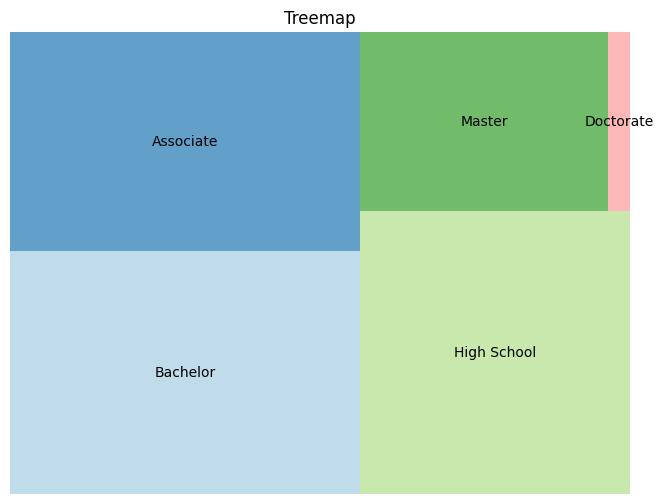

In [23]:
import squarify

#Assuming a DF with column1
column1=df['person_education']

#Calculate the proprotions of each value in the column
value_counts = column1.value_counts(normalize=True).head(20)

#Assign colors to the values
colors = plt.cm.Paired(range(len(value_counts)))

#Create the treemap
plt.figure(figsize=(8,6))
squarify.plot(sizes=value_counts, label=value_counts.index, color=colors, alpha=0.7)
plt.axis('off')
plt.title('Treemap')
plt.show()

###Histogram

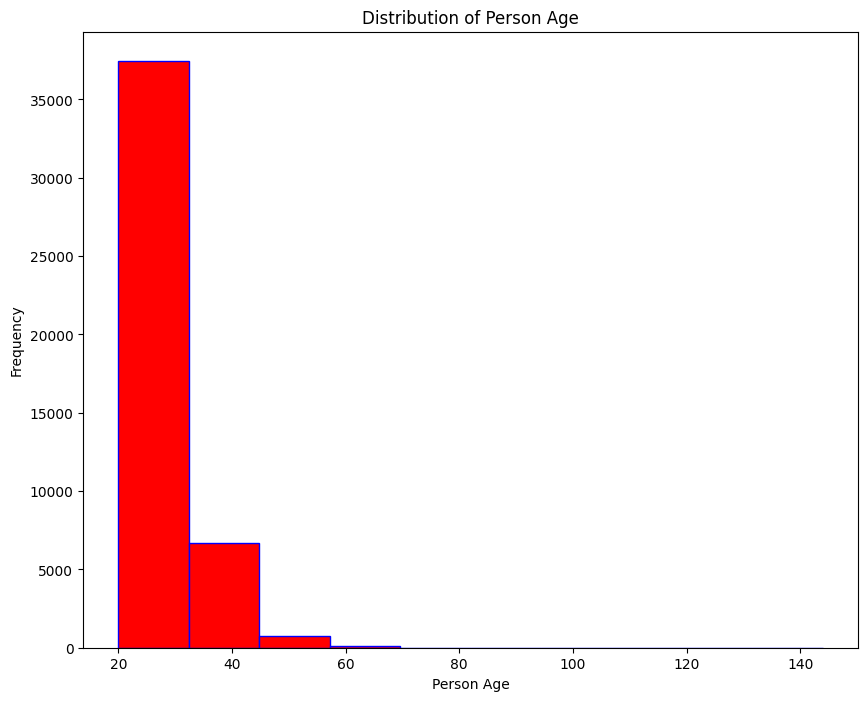

In [24]:
#Assuming a DF with column1
column1 = df['person_age']

plt.figure(figsize=(10, 8))
plt.hist(column1, bins=10, color='red', edgecolor='blue')
plt.title("Distribution of Person Age")
plt.xlabel("Person Age")
plt.ylabel("Frequency")
plt.show()

###Heat Map


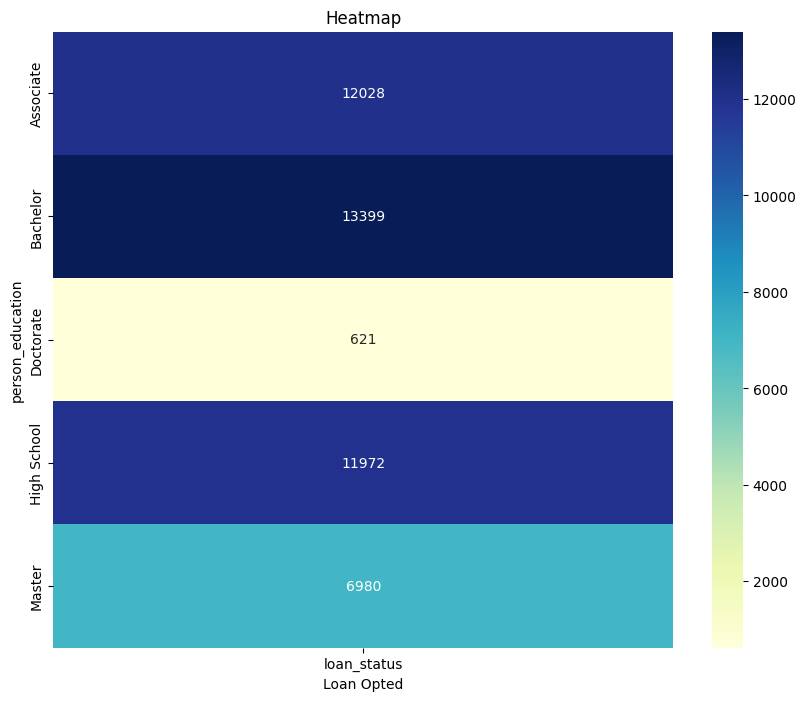

In [25]:
#Assuming a DF with 2 cols, column1 & column2
column1 = 'person_education'
column2 = 'loan_status'

#Create a pivot table with the 2 cols
pivot_table = pd.pivot_table(df, values=column2, index=column1, aggfunc='count')

#Creating a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='g')
plt.title("Heatmap")
plt.xlabel("Loan Opted")
plt.show()

###Correlation Matrix

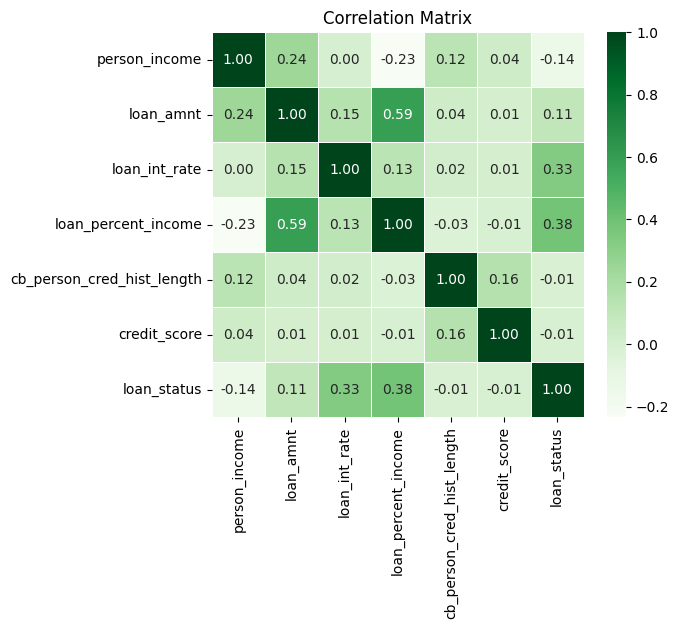

In [26]:
columns = ['person_age', 'person_emp_exp']
corr_matrix = df.select_dtypes(include='number').drop(columns=columns).corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Greens', linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

##Model Building & Evaluation

###Encoding & Finding Important Features in the data



In [27]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)
df = df.drop(categorical_cols, axis=1).join(encoded_cols)

In [28]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Using SMOTE for class Imbalance

In [31]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

###Pie chart

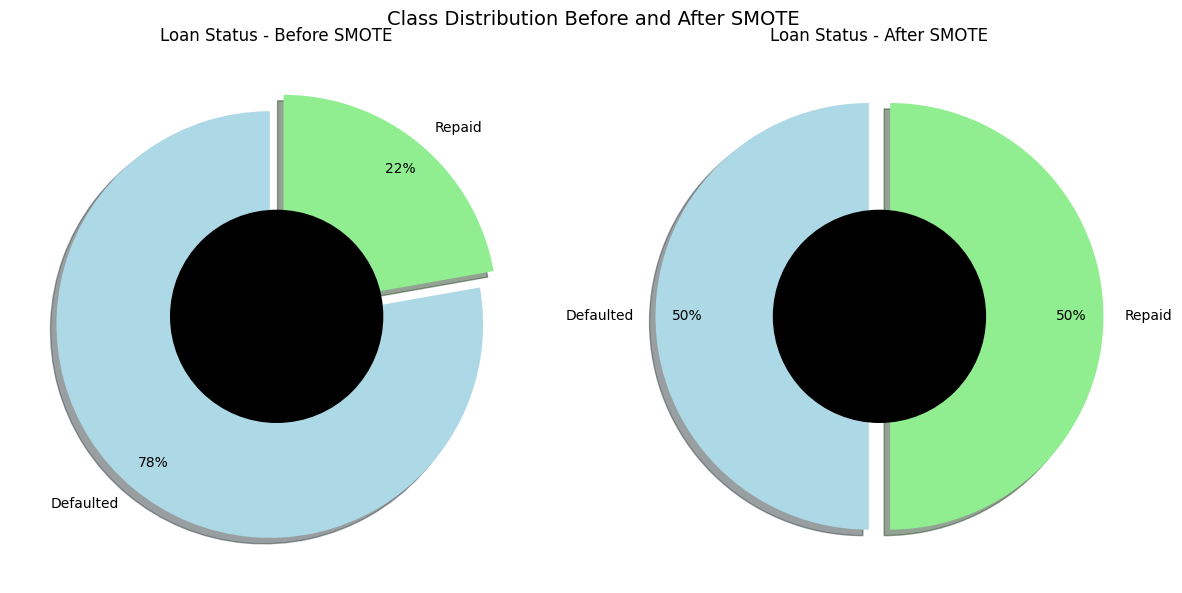

In [32]:
from collections import Counter

before = df['loan_status'].value_counts()
after = Counter(y_train)

labels = ['Defaulted', 'Repaid']
colors = ['lightblue', 'lightgreen']
explode = [0.05, 0.05]

def pie(ax, data, title):
    wedges, texts, autotexts = ax.pie(
        data,
        labels=labels,
        autopct='%1.0f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,
        pctdistance=0.85
    )
    #Center circle
    centre_circle = plt.Circle((0,0), 0.50, fc='black')
    ax.add_artist(centre_circle)
    ax.set_title(title)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
pie(axs[0], before, "Loan Status - Before SMOTE")
pie(axs[1], list(after.values()), "Loan Status - After SMOTE")

plt.suptitle("Class Distribution Before and After SMOTE", fontsize=14)
plt.tight_layout()
plt.show()


###Splitting the data for training and testing

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

###Logistic Regression

Accuracy Score: 88.58 %

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      5594
           1       0.85      0.93      0.89      5606

    accuracy                           0.89     11200
   macro avg       0.89      0.89      0.89     11200
weighted avg       0.89      0.89      0.89     11200



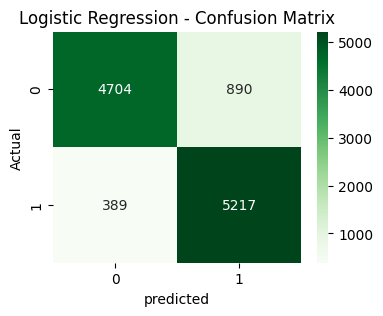

In [34]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_log_pred = log_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, y_log_pred) * 100, 2), '%')
print("\nClassification report:\n", classification_report(y_test, y_log_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_log_pred),
            annot=True, fmt='d', cmap='Greens')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix");

###Random Forest Classifier

Accuracy Score: 95.0 %

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      5594
           1       0.93      0.97      0.95      5606

    accuracy                           0.95     11200
   macro avg       0.95      0.95      0.95     11200
weighted avg       0.95      0.95      0.95     11200



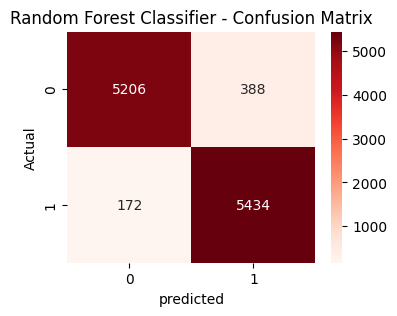

In [35]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

print('Accuracy Score:', round(accuracy_score(y_test, y_rf_pred) * 100, 2), '%')
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_rf_pred),
            annot=True, fmt='d', cmap='Reds')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title('Random Forest Classifier - Confusion Matrix')
plt.show();

###Naive Bayes

Accuracy Score: 82.74 %

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.67      0.80      5594
           1       0.75      0.98      0.85      5606

    accuracy                           0.83     11200
   macro avg       0.86      0.83      0.82     11200
weighted avg       0.86      0.83      0.82     11200



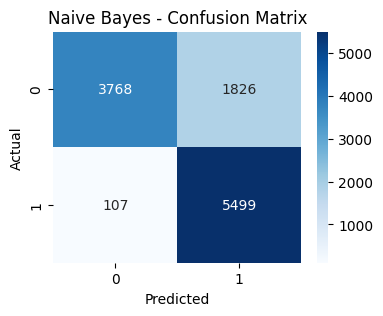

In [36]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_nb_pred = nb_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, y_nb_pred) * 100, 2), '%')
print("\nClassification report:\n", classification_report(y_test, y_nb_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_nb_pred),
            annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes - Confusion Matrix")
plt.show();

###Support Vector Machines

Accuracy Score: 90.77 %

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      5594
           1       0.87      0.96      0.91      5606

    accuracy                           0.91     11200
   macro avg       0.91      0.91      0.91     11200
weighted avg       0.91      0.91      0.91     11200



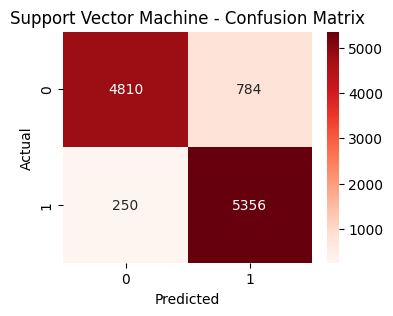

In [37]:
sv_model = SVC()
sv_model.fit(X_train, y_train)

y_sv_pred = sv_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, y_sv_pred) * 100, 2), '%')
print("\nClassification report:\n", classification_report(y_test, y_sv_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_sv_pred),
            annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Support Vector Machine - Confusion Matrix')
plt.show();

###XGBoost Classifier

Accuracy Score: 95.15 %

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      5594
           1       0.95      0.95      0.95      5606

    accuracy                           0.95     11200
   macro avg       0.95      0.95      0.95     11200
weighted avg       0.95      0.95      0.95     11200



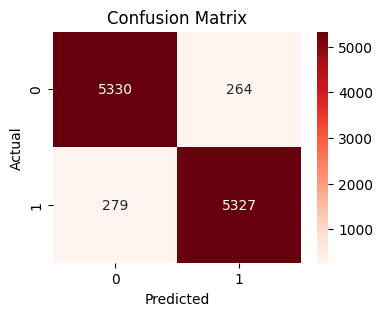

In [38]:
xg_model=XGBClassifier()
xg_model.fit(X_train, y_train)

y_xg_pred = xg_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, y_xg_pred) * 100, 2),'%')
print("\nClassification Report:\n", classification_report(y_test, y_xg_pred))


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_xg_pred),
            annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

###Gradient Boosting Classifier

Accuracy Score: 91.96 %

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      5594
           1       0.90      0.94      0.92      5606

    accuracy                           0.92     11200
   macro avg       0.92      0.92      0.92     11200
weighted avg       0.92      0.92      0.92     11200



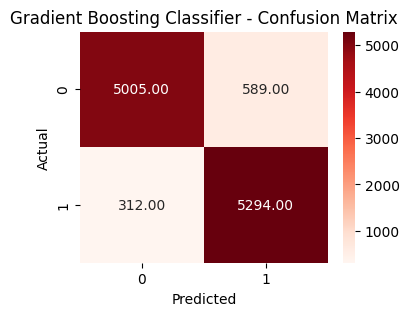

In [39]:
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

gradient_boosting_pred = gradient_boosting_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, gradient_boosting_pred) * 100, 2), '%')
print("\nClassification Report:\n", classification_report(y_test, gradient_boosting_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gradient_boosting_pred),
            annot=True, fmt='.2f', cmap='Reds')
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

###AdaBoost Classifier

Accuracy Score: 88.21 %

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      5594
           1       0.85      0.93      0.89      5606

    accuracy                           0.88     11200
   macro avg       0.89      0.88      0.88     11200
weighted avg       0.89      0.88      0.88     11200



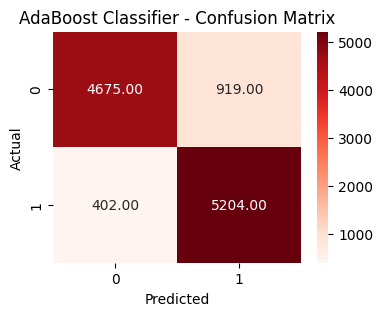

In [40]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

adaboost_pred = adaboost_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, adaboost_pred) * 100, 2), '%')
print("\nClassification Report:\n", classification_report(y_test, adaboost_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, adaboost_pred),
            annot=True, fmt='.2f', cmap='Reds')
plt.title("AdaBoost Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual");

###Bagging Classifier

Accuracy Score: 93.02 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5594
           1       0.93      0.93      0.93      5606

    accuracy                           0.93     11200
   macro avg       0.93      0.93      0.93     11200
weighted avg       0.93      0.93      0.93     11200



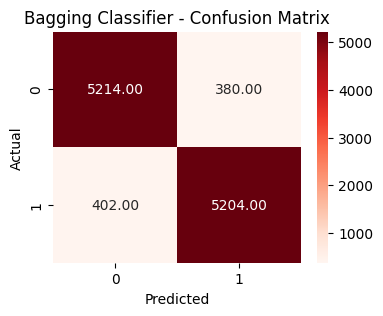

In [41]:
baggingclassifier_model = BaggingClassifier()
baggingclassifier_model.fit(X_train, y_train)

baggingclassifier_pred = baggingclassifier_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, baggingclassifier_pred) * 100, 2), '%')
print("\nClassification Report:\n", classification_report(y_test, baggingclassifier_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, baggingclassifier_pred),
            annot=True, fmt='.2f', cmap='Reds')
plt.title("Bagging Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual");

###Decision Tree Classifier

Accuracy Score: 90.78 %

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      5594
           1       0.90      0.91      0.91      5606

    accuracy                           0.91     11200
   macro avg       0.91      0.91      0.91     11200
weighted avg       0.91      0.91      0.91     11200



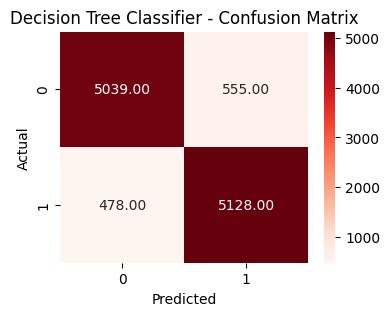

In [42]:
decisiontree_model = DecisionTreeClassifier()
decisiontree_model.fit(X_train, y_train)

decisiontree_pred = decisiontree_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, decisiontree_pred) * 100, 2), '%')
print("\nClassification Report:\n", classification_report(y_test, decisiontree_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, decisiontree_pred),
            annot=True, fmt='.2f', cmap="Reds")
plt.title("Decision Tree Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel('Actual');

###KNN Classifier

Accuracy Score: 91.16 %

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      5594
           1       0.87      0.97      0.92      5606

    accuracy                           0.91     11200
   macro avg       0.92      0.91      0.91     11200
weighted avg       0.92      0.91      0.91     11200



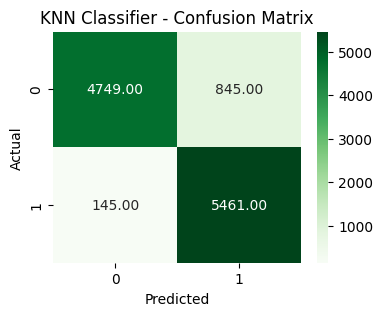

In [43]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, knn_pred) * 100, 2), '%')
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_pred),
            annot=True, fmt='.2f', cmap='Greens')
plt.title("KNN Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual");

Hyperparameter Tuning

In [44]:
#Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best AUC:", grid.best_score_)
print("Best params:", grid.best_params_)
best_rf = grid.best_estimator_

Best AUC: 0.9896215463051629
Best params: {'max_depth': None, 'n_estimators': 200}


###Evaluating the metrics


In [45]:
#Intializing list to store evaluation metrics
classifiers = ['Logistic Regression', 'Random Forest Classifier', 'Naive Bayes', 'Support Vector Machines', 'XGBoost Classifier', 'Gradient Boosting', 'AdaBoost', 'Bagging Classifier', 'Decision Tree', 'KNN Classifier']
precision_scores = []
recall_scores = []
f1_scores = []

#Evaluate each classifier and store evaluation metrics
for classifier, y_pred in zip(classifiers, [y_log_pred, y_rf_pred, y_nb_pred, y_sv_pred, y_xg_pred, gradient_boosting_pred, adaboost_pred, baggingclassifier_pred, decisiontree_pred, knn_pred]):
  report = classification_report(y_test, y_pred, output_dict=True)
  precision_scores.append(round(report['weighted avg']['precision'], 3))
  recall_scores.append(round(report['weighted avg']['recall'], 3))
  f1_scores.append(round(report['weighted avg']['f1-score'], 3))

#Creating a DF to store metrics
evaluation_table = pd.DataFrame({
    'Classifier': classifiers,
    'Precision': precision_scores,
    "Recall": recall_scores,
    "f1-scores": f1_scores
})

print(evaluation_table)

                 Classifier  Precision  Recall  f1-scores
0       Logistic Regression      0.889   0.886      0.886
1  Random Forest Classifier      0.951   0.950      0.950
2               Naive Bayes      0.861   0.827      0.823
3   Support Vector Machines      0.911   0.908      0.907
4        XGBoost Classifier      0.952   0.952      0.952
5         Gradient Boosting      0.921   0.920      0.920
6                  AdaBoost      0.885   0.882      0.882
7        Bagging Classifier      0.930   0.930      0.930
8             Decision Tree      0.908   0.908      0.908
9            KNN Classifier      0.918   0.912      0.911


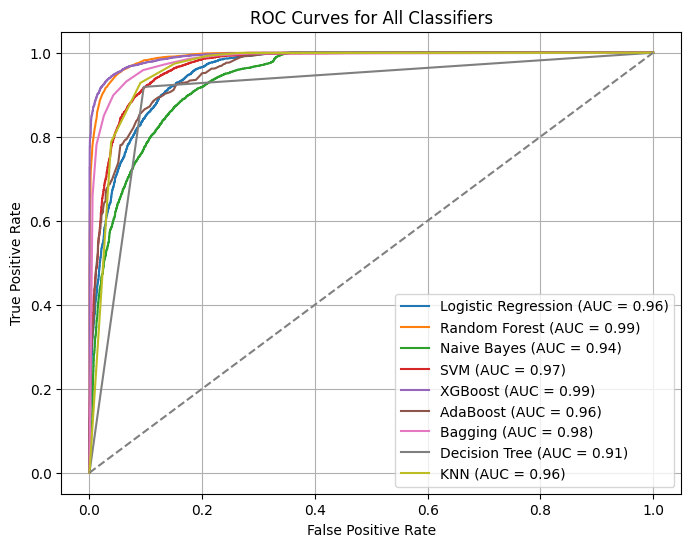

In [46]:
from sklearn.metrics import roc_curve, auc

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(probability=True)),
    ('XGBoost', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Bagging', BaggingClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier())
]
plt.figure(figsize=(8, 6))
for name, model in classifiers:
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Model Visualization

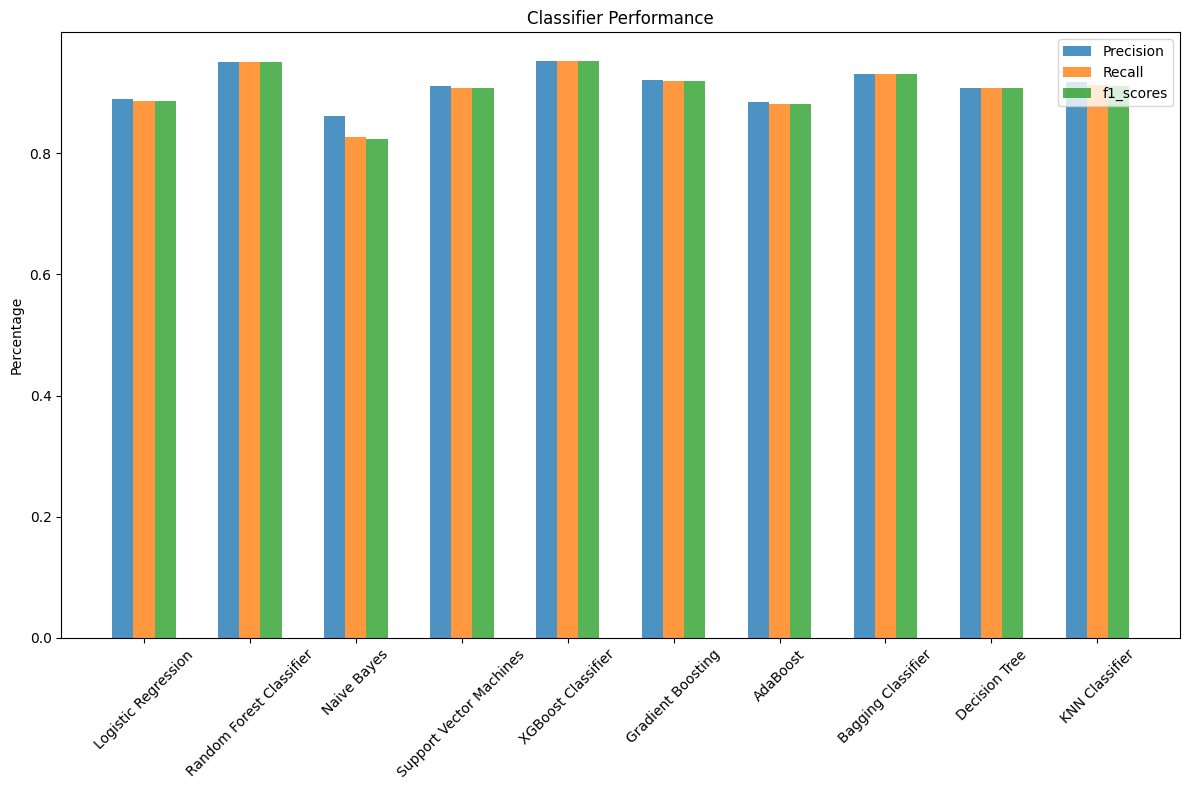

In [47]:
plt.figure(figsize=(12, 8))

#Set position for the bars
pos = list(range(len(evaluation_table)))
width = 0.2

plt.bar(pos, evaluation_table['Precision'], width, alpha=0.8, label='Precision')
plt.bar([p + width for p in pos], evaluation_table['Recall'], width, alpha=0.8, label='Recall')
plt.bar([p + 2 * width for p in pos], evaluation_table['f1-scores'], width, alpha=0.8, label='f1_scores')

plt.xticks([p + width for p in pos], evaluation_table['Classifier'], rotation=45)
plt.title("Classifier Performance")
plt.ylabel("Percentage")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show();

##Final Model

In [48]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_base_xgb = model_rf.predict(X_test)
y_base_xgb

array([1, 1, 0, ..., 1, 1, 1])

Learning Curves for Random Forest Classifier

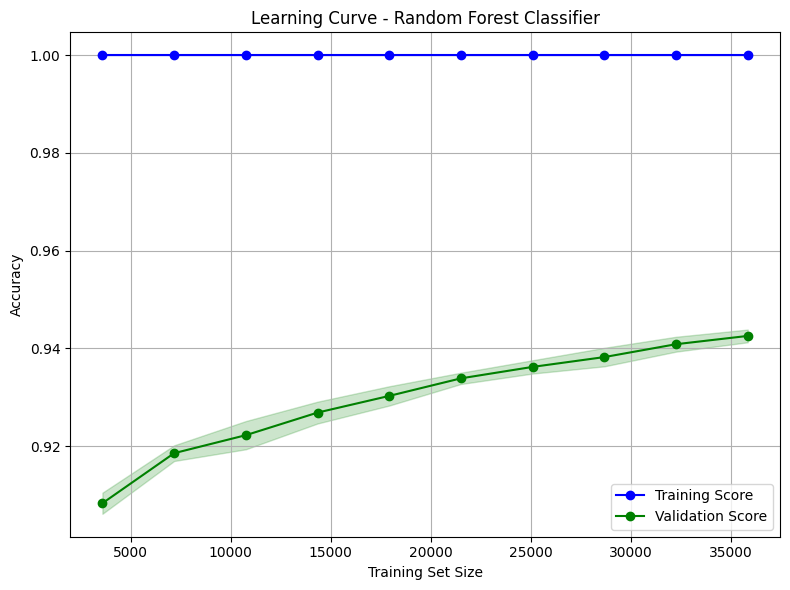

In [49]:
from sklearn.model_selection import learning_curve

# Define model
model_rf = RandomForestClassifier(random_state=42)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model_rf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Test at 10 points between 10% and 100% of training data
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Score', color='green')

# Shaded error bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

plt.title('Learning Curve - Random Forest Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


Roc-Curve for Random Forest Classifier

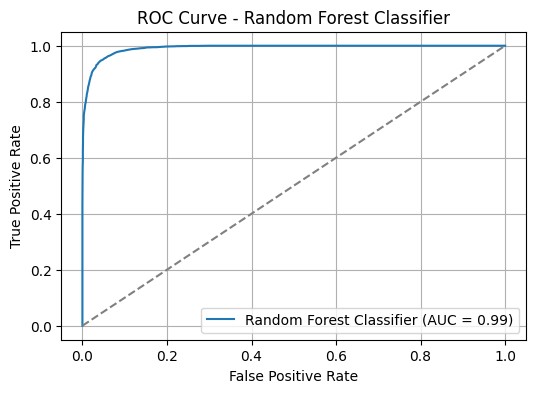

In [50]:
from sklearn.metrics import roc_curve, auc
model_rf.fit(X_train, y_train)
roc_xg = model_rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, roc_xg)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model Saving

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

df1 = pd.read_csv('loan_data.csv')

numerical_cols = [
    'person_age', 'person_income', 'person_emp_exp',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length', 'credit_score'
]

categorical_cols = [
    'person_gender', 'person_education',
    'person_home_ownership', 'loan_intent',
    'previous_loan_defaults_on_file'
]

missing_cols = [col for col in numerical_cols + categorical_cols
                if col not in df1.columns]

df1[numerical_cols] = df1[numerical_cols].fillna(df1[numerical_cols].mean())
df1[categorical_cols] = df1[categorical_cols].fillna(df1[categorical_cols].mode().iloc[0])
df1[categorical_cols] = df1[categorical_cols].astype(str)

df1 = pd.get_dummies(df1,
                     columns=categorical_cols,
                     drop_first=True)

target = 'loan_status'
features = [c for c in df1.columns if c != target]

X_train, X_test, y_train, y_test = train_test_split(
    df1[features], df1[target],
    test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features)
])

pipeline = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'loan_default_pipeline.pkl')

['loan_default_pipeline.pkl']